## 6.8 RMSProp算法
Adagrad算法优化了学习率的调整，但仍然存在一些问题。例如：它很多时候存在学习率过小的问题，收敛速度较慢。为此，科学家们又有针对性的提出了更多改进。RMSProp 算法就是其中比较典型的一种变体。本节咱们具体介绍它。

### 6.8.1 基本思想
RMSProp 算法是由 Geoffrey Hinton 提出的一种优化算法，主要用于解决梯度下降中的学习率调整问题。

在梯度下降中，每个参数的学习率是固定的。但在实际应用中，每个参数的最优学习率可能是不同的。如果学习率过大，则模型可能会跳出最优值；如果学习率过小，则模型的收敛速度可能会变慢。

RMSProp 算法通过自动调整每个参数的学习率来解决这个问题。它在每次迭代中维护一个指数加权平均值，用于调整每个参数的学习率。如果某个参数的梯度较大，则RMSProp算法会自动减小它的学习率；如果梯度较小，则会增加学习率。这样可以使得模型的收敛速度更快。

这种算法的计算公式如下：

$$g_t \leftarrow \rho g_{t-1} + (1-\rho) \frac{\partial L}{\partial w}^2$$

$$w \leftarrow w - \frac{\eta}{\sqrt{g_t + \epsilon}} \frac{\partial L}{\partial w}$$

其中 $g_t$ 是指数加权平均值，$\rho$ 是衰减率，$\eta$ 是学习率，$\epsilon$ 是为了防止分母为0而添加的一个很小的常数。在每次迭代时，RMSProp 算法会计算参数的梯度平方值的指数加权平均值 $g_t$，然后使用这个值来调整参数的学习率。这样可以使得模型的收敛速度更快，并且能够自动调整学习率。

### 6.8.2 算法优缺点

任何事物都是有两面性的，深度学习的每种算法都不例外。明确它们的优缺点才能更好的理解它们。对RMSProp算法而言，尽管它在Adagrad算法的基础上进行了改进，但依然优缺点都很突出。

优点方面，RMSProp算法能够自动调整学习率，使得模型的收敛速度更快。它可以避免学习率过大或过小的问题，能够更好地解决学习率调整问题。实现上看它较为简单，适用于各种优化问题。

缺点方面，它在处理稀疏特征时可能不够优秀。此外，它需要调整超参数，如衰减率 $\rho$ 和学习率 $\eta$，这需要一定的经验。还有，收敛速度可能不如其他我们后面会介绍的优化算法，例如 Adam算法。

不过，瑕不掩瑜。RMSProp算法还是一种优化算法发展进程中非常优秀的算法。

### 6.8.3 代码示例

我们用一个简单的线性回归的例子来演示RMSProp算法的pytorch代码实现，方便你的理解。

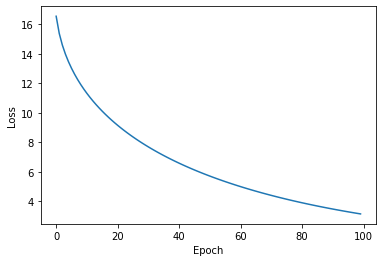

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import matplotlib.pyplot as plt

# 假设我们有一个简单的线性回归模型
# y = w * x + b
# 其中 w 和 b 是需要学习的参数

# 定义超参数
learning_rate = 0.01
num_epochs = 100

# 随机生成训练数据
X = torch.randn(100, 1)
y = 2 * X + 3 + torch.randn(100, 1)

# 初始化参数
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 创建 RMSProp optimizer
optimizer = torch.optim.RMSprop([w, b], lr=learning_rate)

# 记录每次迭代的 loss
losses = []

# 训练模型
for epoch in range(num_epochs):
  # 计算预测值
  y_pred = w * X + b

  # 计算 loss
  loss = torch.mean((y_pred - y) ** 2)

  # 记录 loss
  losses.append(loss.item())

  # 清空上一步的梯度
  optimizer.zero_grad()

  # 计算梯度
  loss.backward()

  # 更新参数
  optimizer.step()

# 可视化训练过程
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


RMSProp 算法在训练过程中是通过自动调整学习率来优化模型参数的。因此，它并没有明显的搜索过程。但是，我们可以通过观察训练过程中的损失，了解模型的训练情况。如果损失在不断降低，则说明模型的训练效果较好；如果损失不再降低，则说明模型可能已经达到了最优解或者出现了过拟合。
这个过程中我们可以判断模型的训练效果，并适当调整超参数，以提高模型的泛化能力。

**梗直哥提示：如果简单了解RMSProp算法的基本原理并不难，但这样其实只掌握了其功力的30%。最精华的其实是为什么提出这种算法，人家怎么就能提出这种算法，当时是怎么想的等等一系列更加深入的问题。只有这样才能不光知其然，还能知其所以然，充分提升自己深度学习的境界。欢迎来到哥的课堂，就这些进阶问题，帮你武装自己。更多了解加V：gengzhige99**

[Next 6-9 Adadelta算法](./6-9%20Adadelta算法.ipynb)